In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA
from scipy.stats import chi2
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
mm = pd.read_stata('mmreg.dta')
mm

,id,locus_of_control,self_concept,motivation,read,write,math,science,female
0,303.0,-0.84,-0.24,1.00,54.799999,64.500000,44.500000,52.599998,1.0
1,404.0,-0.38,-0.47,0.67,62.700001,43.700001,44.700001,52.599998,1.0
2,225.0,0.89,0.59,0.67,60.599998,56.700001,70.500000,58.000000,0.0
3,553.0,0.71,0.28,0.67,62.700001,56.700001,54.700001,58.000000,0.0
4,433.0,-0.64,0.03,1.00,41.599998,46.299999,38.400002,36.299999,1.0
...,...,...,...,...,...,...,...,...,...
595,464.0,0.94,-0.30,1.00,60.099998,67.099998,52.400002,55.299999,1.0
596,291.0,0.23,0.03,1.00,65.400002,56.700001,65.400002,58.000000,1.0
597,348.0,0.46,0.03,1.00,65.400002,51.500000,61.400002,60.700001,1.0
598,193.0,0.51,0.03,1.00,54.799999,54.099998,66.400002,41.700001,1.0


In [3]:
mm.isna().sum()

id                  0
locus_of_control    0
self_concept        0
motivation          0
read                0
write               0
math                0
science             0
female              0
dtype: int64

In [4]:
mm.describe().T

,count,mean,std,min,25%,50%,75%,max
id,600.0,300.500000,173.348816,1.000000,150.750000,300.500000,450.250000,600.000000
locus_of_control,600.0,0.096533,0.670280,-2.230000,-0.372500,0.210000,0.510000,1.360000
self_concept,600.0,0.004917,0.705512,-2.620000,-0.300000,0.030000,0.440000,1.190000
motivation,600.0,0.660833,0.342729,0.000000,0.330000,0.670000,1.000000,1.000000
read,600.0,51.901833,10.102986,28.299999,44.200001,52.099998,60.099998,76.000000
write,600.0,52.384834,9.726455,25.500000,44.299999,54.099998,59.900002,67.099998
math,600.0,51.848999,9.414738,31.799999,44.500000,51.299999,58.374999,75.500000
science,600.0,51.763332,9.706173,26.000000,44.400002,52.599998,58.650000,74.199997
female,600.0,0.545000,0.498387,0.000000,0.000000,1.000000,1.000000,1.000000


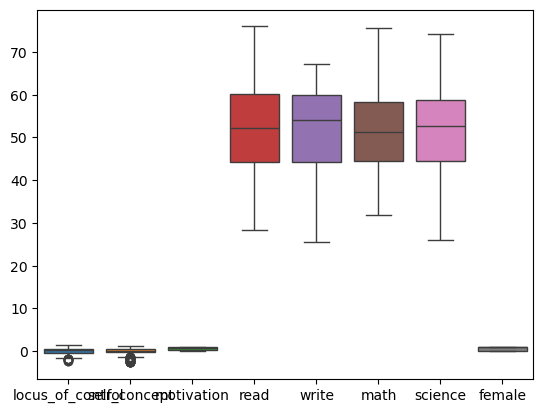

In [5]:
sns.boxplot(data=mm.drop('id', axis=1))
plt.show()

In [6]:
# Function to detect outliers using IQR
def detect_outliers_iqr(mm, column):
    q1 = mm[column].quantile(0.25)
    q3 = mm[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = mm[(mm[column] < lower_bound) | (mm[column] > upper_bound)]
    return outliers
# Detect outliers in numerical columns
numerical_cols = ['locus_of_control', 'self_concept', 'motivation', 'read', 'write', 'math', 'science']
for col in numerical_cols:
    outliers = detect_outliers_iqr(mm, col)
    if not outliers.empty:
        print(f"Outliers in '{col}':")

    else:
        print(f"No outliers found in '{col}'")

Outliers in 'locus_of_control':
Outliers in 'self_concept':
No outliers found in 'motivation'
No outliers found in 'read'
No outliers found in 'write'
No outliers found in 'math'
No outliers found in 'science'


<Axes: ylabel='locus_of_control'>

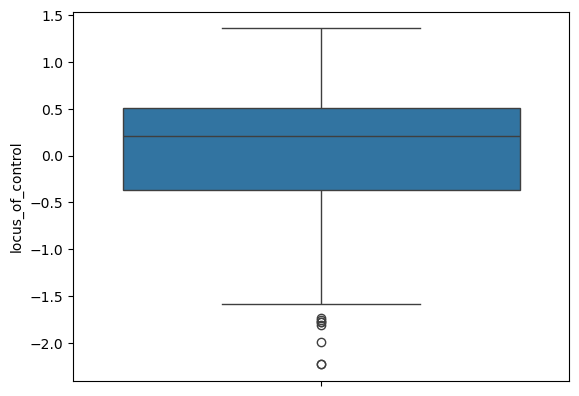

In [7]:
sns.boxplot(mm['locus_of_control'])

<Axes: ylabel='self_concept'>

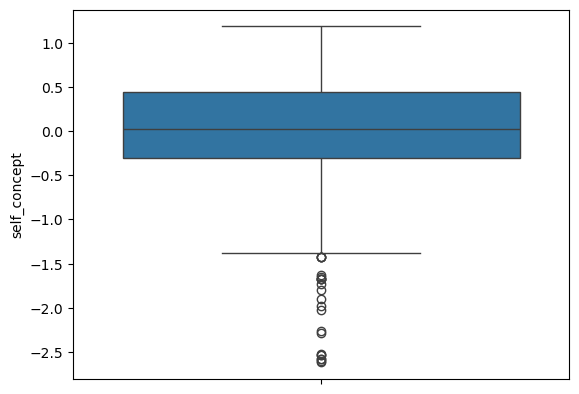

In [8]:
sns.boxplot(mm['self_concept'])

In [9]:
df = mm.copy()

In [10]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['locus_of_control'].quantile(0.25)
Q3 = df['locus_of_control'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [11]:
#  Remove the outliers and make a new dataframe
df_no_outliers = df[(df['locus_of_control'] >= lower_bound) & (df['locus_of_control'] <= upper_bound)]

In [12]:
df_no_outliers = df[(df['self_concept'] >= lower_bound) & (df['self_concept'] <= upper_bound)]

In [13]:
new_df = df_no_outliers.copy()

In [14]:
new_df

,id,locus_of_control,self_concept,motivation,read,write,math,science,female
0,303.0,-0.84,-0.24,1.00,54.799999,64.500000,44.500000,52.599998,1.0
1,404.0,-0.38,-0.47,0.67,62.700001,43.700001,44.700001,52.599998,1.0
2,225.0,0.89,0.59,0.67,60.599998,56.700001,70.500000,58.000000,0.0
3,553.0,0.71,0.28,0.67,62.700001,56.700001,54.700001,58.000000,0.0
4,433.0,-0.64,0.03,1.00,41.599998,46.299999,38.400002,36.299999,1.0
...,...,...,...,...,...,...,...,...,...
595,464.0,0.94,-0.30,1.00,60.099998,67.099998,52.400002,55.299999,1.0
596,291.0,0.23,0.03,1.00,65.400002,56.700001,65.400002,58.000000,1.0
597,348.0,0.46,0.03,1.00,65.400002,51.500000,61.400002,60.700001,1.0
598,193.0,0.51,0.03,1.00,54.799999,54.099998,66.400002,41.700001,1.0


In [15]:
# Psychological variables
X = new_df[['locus_of_control', 'self_concept', 'motivation']]

# Academic variables
Y = new_df[['read', 'write', 'math', 'science']]

In [18]:
# Standardize
X_scaled = StandardScaler().fit_transform(X)
Y_scaled = StandardScaler().fit_transform(Y)

In [19]:
# Run CCA
n_components = min(X.shape[1], Y.shape[1])
cca = CCA(n_components=n_components)
X_c, Y_c = cca.fit_transform(X_scaled, Y_scaled)

In [20]:
# Canonical correlations
corrs = np.array([np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(n_components)])
print("Canonical correlations:", corrs)

Canonical correlations: [0.45884559 0.14730892 0.02066062]


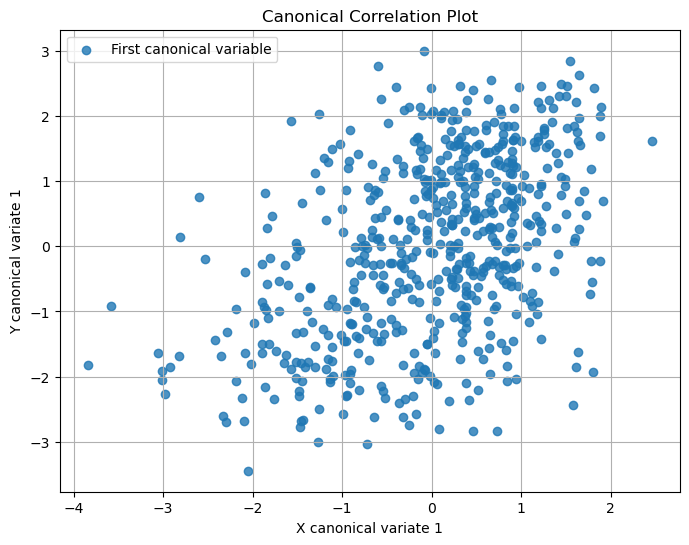

In [21]:
#Plot the Canonical Variates

plt.figure(figsize=(8, 6))
plt.scatter(X_c[:, 0], Y_c[:, 0], label="First canonical variable", alpha=0.8)
plt.xlabel("X canonical variate 1")
plt.ylabel("Y canonical variate 1")
plt.title("Canonical Correlation Plot")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# These show how much each original variable contributes to the canonical variate
X_weights = cca.x_weights_
Y_weights = cca.y_weights_

print("\nLoadings for Psychological Variables:")
for i, var in enumerate(X.columns):
    print(f"  {var}: {X_weights[i][0]:.4f}")

print("\nLoadings for Academic Variables:")
for i, var in enumerate(Y.columns):
    print(f"  {var}: {Y_weights[i][0]:.4f}")


Loadings for Psychological Variables:
  locus_of_control: 0.8775
  self_concept: -0.1957
  motivation: 0.4378

Loadings for Academic Variables:
  read: 0.5929
  write: 0.7631
  math: 0.2486
  science: -0.0656


# Interpretation: 
The canonical correlation analysis produced a correlation of 0.4588, indicating a moderate positive relationship between the psychological and academic variable sets. For the psychological variables, locus of control had the highest positive weight (0.8775), making it the most influential contributor, followed by motivation (0.4378).
In contrast, self-concept showed a small negative weight (–0.1957), suggesting a minimal inverse contribution.
For the academic variables, writing had the strongest positive weight (0.7631), followed by reading (0.5929) and math (0.2486), while science had a very small negative weight (–0.0656), indicating negligible influence.

In [23]:
# Significance testing using Wilks’ Lambda
n, p, q = X.shape[0], X.shape[1], Y.shape[1]
m = min(p, q)

for k in range(m):
    lambda_val = np.prod(1 - corrs[k:]**2)
    df = (p - k) * (q - k)
    chi_sq = -(n - 1 - (p + q + 1) / 2) * np.log(lambda_val)
    p_val = 1 - chi2.cdf(chi_sq, df)
    print(f"Root {k+1}: Wilks’ Lambda={lambda_val:.4f}, Chi2={chi_sq:.2f}, df={df}, p={p_val:.4f}")

Root 1: Wilks’ Lambda=0.7720, Chi2=150.35, df=12, p=0.0000
Root 2: Wilks’ Lambda=0.9779, Chi2=12.99, df=6, p=0.0431
Root 3: Wilks’ Lambda=0.9996, Chi2=0.25, df=2, p=0.8834


# Interpretation:  
Root 1 and Root 2 are significant, so 2 canonical dimensions are necessary to understand the association between the two sets of variables.